<a href="https://colab.research.google.com/github/ArefehK78/PycoinGecko/blob/main/PycoinGecko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycoingecko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pycoingecko import CoinGeckoAPI

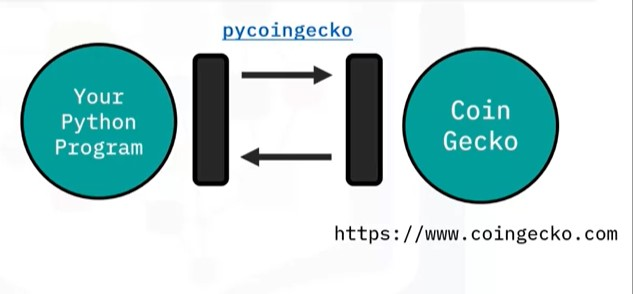

In [3]:
#create cliebt object
cg = CoinGeckoAPI()

In [6]:
bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin' , vs_currency= 'usd' , days= 30 )
#the answer is a JSON file expressed as a python dictionary of nested List
print(bitcoin_data.keys())

dict_keys(['prices', 'market_caps', 'total_volumes'])


In [ ]:
bitcoin_data['prices']

In [8]:
import pandas as pd

In [12]:
data = pd.DataFrame(bitcoin_data['prices'], columns= ['TimeStamps', 'Price'])

In [14]:
data.head()

,TimeStamps,Price
0,1675846857874,23207.522909
1,1675850567141,23211.875881
2,1675854039035,23167.647299
3,1675857723007,23164.578703
4,1675861234160,23125.045056


In [22]:
#hard to understand time format so convert it to more readable format using Pandas function to_datatime
data['Date'] = pd.to_datetime(data['TimeStamps'],unit = 'ms' )
data.head()

,TimeStamps,Price,Date
0,1675846857874,23207.522909,2023-02-08 09:00:57.874
1,1675850567141,23211.875881,2023-02-08 10:02:47.141
2,1675854039035,23167.647299,2023-02-08 11:00:39.035
3,1675857723007,23164.578703,2023-02-08 12:02:03.007
4,1675861234160,23125.045056,2023-02-08 13:00:34.160


In [28]:
#create csndle sticj plot
candlestick_data = data.groupby(data.Date.dt.date).agg({'Price': ['min', 'max', 'first', 'last']})
candlestick_data.head()

Price                                          
                     min           max         first          last
Date                                                              
2023-02-08  22871.103325  23211.875881  23207.522909  22957.553733
2023-02-09  21844.198228  23009.061325  22947.507829  21844.198228
2023-02-10  21499.661732  21958.603366  21809.953941  21518.879041
2023-02-11  21643.699159  21851.016108  21643.699159  21851.016108
2023-02-12  21792.247987  22077.091347  21889.579131  21829.311446

In [30]:
from matplotlib import pyplot
!pip install plotly


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import plotly
import plotly.graph_objs as go

In [36]:
import plotly.graph_objects as go # or plotly.express as px
 # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )



In [38]:
fig = go.Figure(data=[go.Candlestick(x = candlestick_data.index,
                                     open = candlestick_data['Price']['first'],
                                     high = candlestick_data['Price']['max'],
                                     low = candlestick_data['Price']['min'],
                                     close = candlestick_data['Price']['last'])
                                      ])

In [60]:
fig.update_layout(xaxis_rangeslider_visible = False, xaxis_title = 'Date', 
                  yaxis_title='Price (USD $)' , title = 'Bitcoin Candlestick Chart Over Past 30 Days')

In [58]:
plotly.offline.plot(fig, filename ='bitcoin_candlestick_graph.html')

'bitcoin_candlestick_graph.html'